In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from common import plot_crv
plt.style.use('ggplot')

## Непрерывные случайные величины

### Непрерывное равномерное распределение

Непрырывное равномерное распределение ограничивает значения СВ отрезком $[a,b]$ с плотностью вероятности:

$$
f(x) = \begin{cases}
    \frac{1}{b-a},& \text{для } x \in [a,b]\\
    0,                & \text{для } x \notin [a,b]
\end{cases}
$$

и значением функции распределения:

$$
F(x) = \begin{cases}
0,& \text{для } x < a\\
\frac{x-a}{b-a},              & \text{для } a \leq x < b\\ 
1,                & \text{для } x \leq b
\end{cases}
$$

$$E(X) = \frac{a+b}{2}$$

$$V(X) = \frac{(b-a)^2}{12}$$

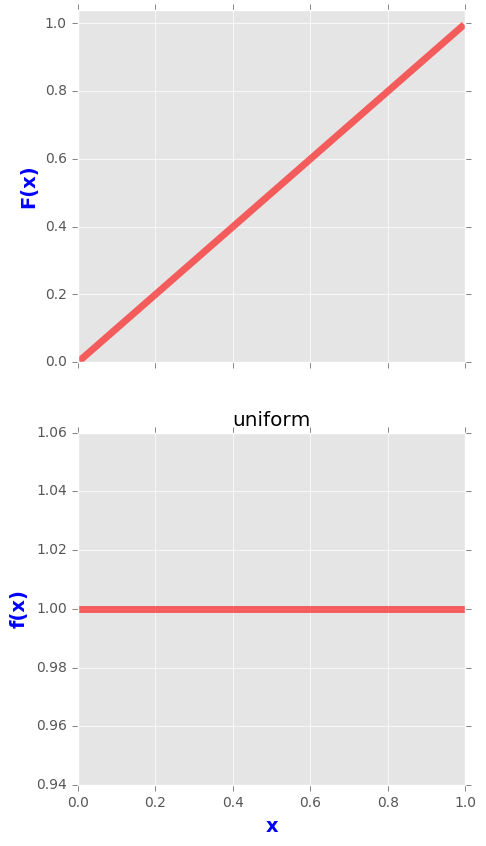

In [3]:
x = np.linspace(stats.uniform.ppf(0.01),
                stats.uniform.ppf(0.99), 100)
plot_crv('uniform', x, stats.uniform.cdf(x), stats.uniform.pdf(x))

**Пример:**
* генерация случайных величин методом обратной функции $y = F^{-1}(x)$, где $y$ - значение искомой СВ, $x$ - реализация непрерывной равномерной СВ на отрезке $[0,1]$)

### Непрерывное нормальное распределение

Случайная величина распределена нормально с парметрами $\mu$ и $\sigma$, если плотность вероятности СВ выражена как:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} exp \left (-\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

Функция вероятности является интегралом по всей области значений меньшей $x$:

$$
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2\pi}} exp \left( -\frac{(t-\mu)^2}{2\sigma^2} \right) dt
$$

Нормальное распределние является бесконечно делимым, а именно: если $X_1$ и $X_2$ являются нормально распределенными СВ с параметрами $\mu_1, \sigma_1$ и $\mu_2, \sigma_2$, то их сумма также будет иметь нормальное распределение с параметрами $\mu_1+\mu_2, \sigma_1 + \sigma_2$.

Нетрудно заметить, что:

$$E(X) = \mu$$
$$V(X) = \sigma^2$$

Нормальное распределение с фикисрованными параметрами $\mu = 0$ и $\sigma = 1$ используется столь часто, что получило свое особое название - **стандартное нормальное распределение**.

$$\phi(x) = \frac{exp \left(-\frac{1}{2}x^2 \right)}{\sqrt{2\pi}}$$

$$\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} exp \left( \frac{-t^2}{2} \right)dt$$

Распределение с произвольными параметрами $\mu$ и $\sigma$ легко представляется в виде стандартного нормального распределения:

$$ F(x) = \Phi \left( \frac{X-\mu}{\sigma} \right) $$

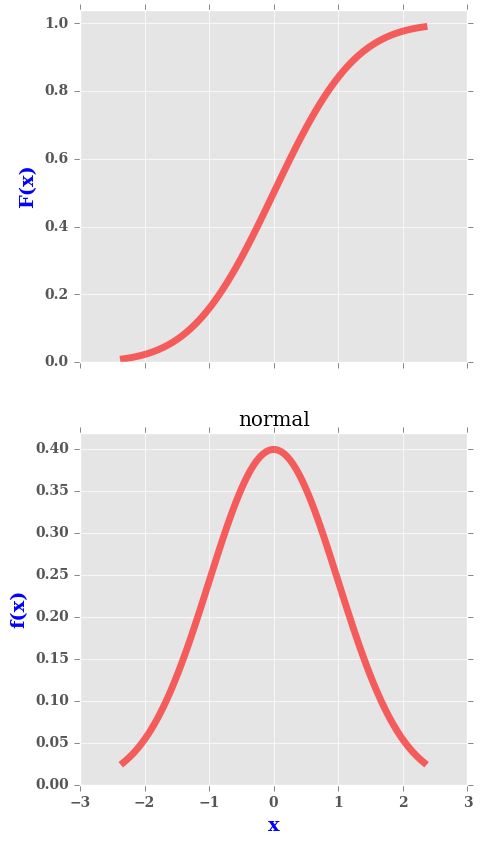

In [4]:
x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
plot_crv('normal', x, stats.norm.cdf(x), stats.norm.pdf(x), set_ylim=True)

** Примеры**:
* мы их подробно разберем в последующих темах, поэтому не будем останавливаться здесь.

**Связь нормально распределенных СВ с другими законами распределения**:
* логнормальное распределение;
* сумма квадратов $k$ независимых стандартных нормальных СВ имеет распределение $\chi^2$ со степенями свободы k;
* t-распределение Стьюдента. Об этой связи мы поговорим чуть позже - когда будем рассматривать оценки параметров;
* F-распределние Фишера. Если $(X_1, ..., X_m), (Y_1, ..., Y_m)$ - независимые стандартные величины, то отношение суммы их квадратов будет иметь F-распределние Фишера с параметрами $(n, m)$

### Логнормальное распределение

Если логарифм случайной величины имеет нормальное распределение, то сама величина имеет логнормальной распределение

$$
X_1, ..., X_n - iid \\
L = X_1 * X_2  ... *  X_n \\
\ln{L} = \ln{X_1}+ .... \ln{X_n} \\
ln{X_1}, ...,\ln{X_n} - iid \\
\ln{L} \text{~} N
$$

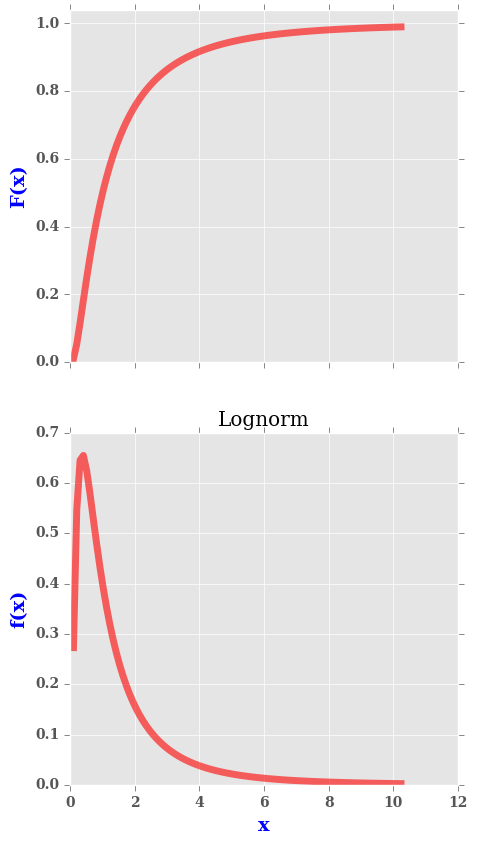

In [5]:
s = 1
x = np.linspace(stats.lognorm.ppf(0.01, s), stats.lognorm.ppf(0.99, s), 100)
plot_crv('Lognorm', x, stats.lognorm.cdf(x, s), stats.lognorm.pdf(x, s))


Существет мнение, что значительная часть процессов в окружающем мире имеет логнормальное, а не нормальное распределение, т.к. большая часть процессов имеют не аддитивный. а мультипликативный характер.

### Распределение Вейбулла

Распределение временных интервалов, проходящих до события (отказа)

$$
f(x) = \begin{cases}
    \frac{k}{λ} (\frac{x}{λ})^{k-1} e^{-(\frac{x}{λ})^{k}}, & x \geq 0  \\
    0, & x < 0 
\end{cases}
$$

k < 1 показывает, что интенсивность отказов уменьшается со временем

k = 1 показывает, что интенсивность отказов не меняется со временем

k > 1 показывает, что интенсивность отказов увеличивается со временем

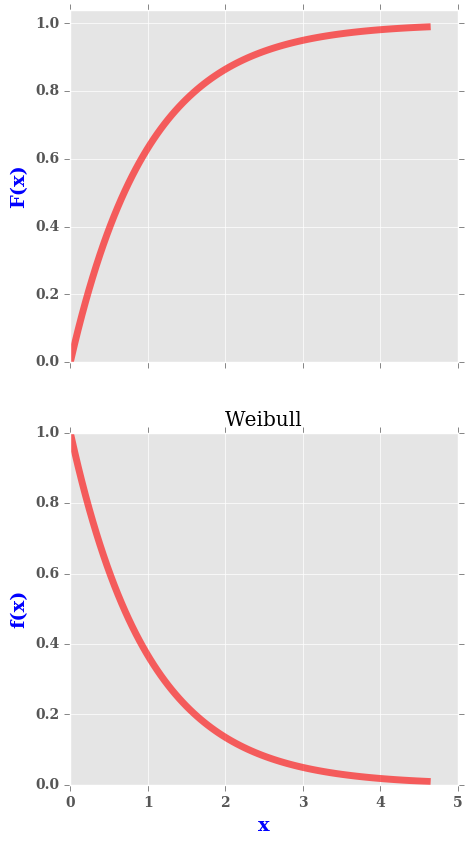

In [6]:
k = 1
x = np.linspace(stats.weibull_min.ppf(0.01, k), stats.weibull_min.ppf(0.99, k), 100)
plot_crv('Weibull', x, stats.weibull_min.cdf(x, k), stats.weibull_min.pdf(x, k))

Можно моделировать: выживаемость организмов, время до отказа механизмов, продолжительность пользователских сессий и т.д.